### Load library & prepare the data

In [38]:
# load library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [39]:
# set matplotlib defaults
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10,
)

In [40]:
def score_dataset(X, y, model=XGBRegressor()):
  # label encoding for categoricals
  for colname in X.select_dtypes(['category', 'object']):
    X[colname], _ = X[colname].factorize()
  # metric for housing competition is RMSLE (Root Mean Squared Log Error)
  score = cross_val_score(
      model, X, y, cv=5, scoring='neg_mean_squared_log_error',
  )
  score = -1 * score.mean()
  score = np.sqrt(score)
  return score

In [41]:
# prepare the data
df = pd.read_csv('ames.csv')

### Create a feature of cluster labels
Creating a k-means clustering with the following parameters:
* Features: `LotArea`, `TotalBsmtSF`, `FirstFlrSF`, `SecondFlrSF`, `GrLivArea`
* Number of clusters: 10
* Iterations: 10 

In [42]:
X = df.copy()
y = X.pop('SalePrice')

# define list of features
features = ['LotArea', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'GrLivArea',]

# standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X['Cluster'] = kmeans.fit_predict(X_scaled)

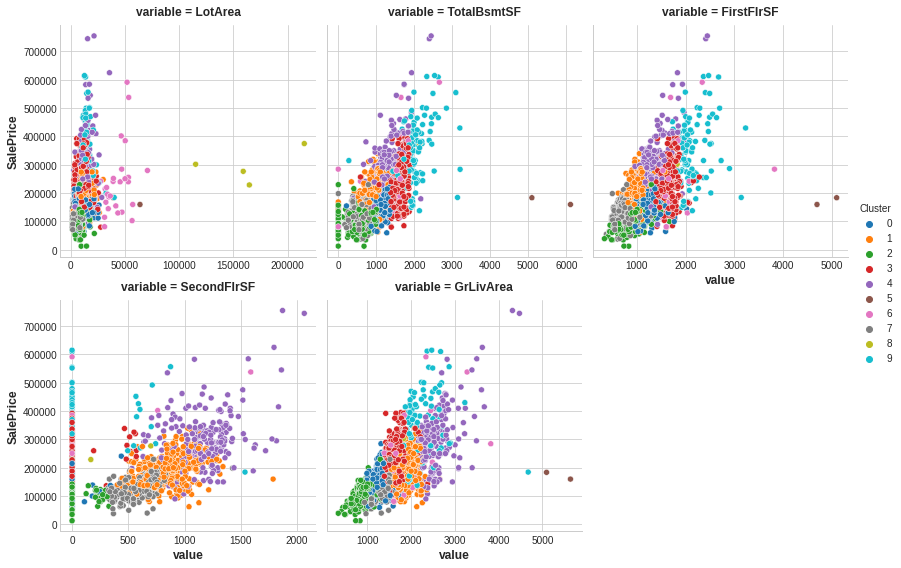

In [43]:
Xy = X.copy()
Xy['Cluster'] = Xy.Cluster.astype('category')
Xy['SalePrice'] = y

sns.relplot(
    x='value', y='SalePrice', hue='Cluster', col='variable',
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=['SalePrice', 'Cluster'],
    ),
);

In [44]:
# score dataset
score_dataset(X, y)

[02:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.13604789237441883

### Cluster-Distance Features
Add cluster-distance features to your dataset (using `fit_transform` method of `kmeans` insted of `fit_predict`)

In [45]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X_cd = kmeans.fit_transform(X_scaled)
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)

In [46]:
# score dataset
score_dataset(X, y)

[02:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.1384101763279874